## A. Thu thập dữ liệu

### Ngữ cảnh và động lực 

### Nguồn dữ liệu

- Tập dữ liệu này được sử dụng cho việc phân tích trong lĩnh vực tiêu thụ năng lượng và điện năng, so sánh tỉ lệ tiêu thụ giữa các quốc gia và khám phá những thay đổi trong xu hướng tiêu thụ năng lượng ở các quốc gia trên thế giới theo thời gian
- Tập dữ liệu được thu thập từ trang Kaggle: https://www.kaggle.com/datasets/labisininiolakamal/energy-production-2001-2021.
- Tác giá: LABISI NINIOLA KAMAL
- License của dataset: Apache 2.0

## B. Khám phá dữ liệu

### Import thư viện

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
from plotly.subplots import make_subplots

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from langdetect import detect
from wordcloud import WordCloud

import nltk
#nltk.download('stopwords')

### Đọc dữ liệu

In [2]:
current_directory = os.getcwd()
relative_path = "../datasets/Energy generataion data (2000-2021).csv"

file_path = os.path.join(current_directory, relative_path)
raw_df = pd.read_csv(file_path, encoding='latin1')
raw_df.head(5)

,Country,Code,Year,Population,Other renewables excluding bioenergy (Twh),Electricity from bioenergy (Twh),Electricity from solar (Twh),Electricity from wind (Twh),Electricity from hydro (Twh),Electricity from nuclear(Twh),...,Annual Co2 emissions,Annual Co2 relativity(%),Annual Co2 emissions per person,Annual Co2 emissions from coal,Annual Co2 emissions from gas,Annual Co2 emissions from oil,Access to electricity (% of population),access to electricity (percentile),Access to electricity (population),Primary energy consumption per capita (kWh/person)
0,Afghanistan,AFG,2001,"19,688,634",0.0,0.0,0.0,0.0,0.50,0.0,...,"1,069,098",0,0.05,"69,616","208,848","762,112",4.07,0.04,"802,228",237
1,Afghanistan,AFG,2004,"23,553,554",0.0,0.0,0.0,0.0,0.56,0.0,...,"1,237,247",16,0.05,"91,600","227,168","908,672",20.06,0.20,"4,726,013",204
2,Afghanistan,AFG,2002,"21,000,258",0.0,0.0,0.0,0.0,0.56,0.0,...,"1,340,995",8,0.06,"55,109","547,416","727,438",9.41,0.09,"1,975,947",211
3,Afghanistan,AFG,2003,"22,645,136",0.0,0.0,0.0,0.0,0.63,0.0,...,"1,559,602",16,0.07,"91,813","466,408","991,575",14.74,0.15,"3,337,555",230
4,Afghanistan,AFG,2005,"24,411,196",0.0,0.0,0.0,0.0,0.59,0.0,...,"1,889,507",21,0.08,"106,256","329,760","1,447,280",25.39,0.25,"6,198,221",252


### Tập dữ liệu có bao nhiêu dòng, cột?

In [3]:
shape = raw_df.shape
print(f'Có {shape[0]} dòng và {shape[1]} cột')

Có 4307 dòng và 23 cột


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng trong dataset này cung cấp thông tin chi tiết về sự tiêu thụ các loại năng lượng và tác động môi trường của năng lượng(dựa vào độ đo CO2) trong một quốc gia vào một năm cụ thể.
- Nếu các dòng có ý nghĩa khác nhau sẽ làm cho tính tin cậy của tập dữ liệu bị giảm đi và có thể dẫn đến một vài sự nhầm lẫn và tính nhất quán giữa chúng.

### Mỗi cột có ý nghĩa gì?


In [4]:
new_column_names = {
    "Country": "country",
    "Code": "code",
    "Year": "year",
    "Population": "population",
    "Other renewables excluding bioenergy (Twh)": "renewables_excl_bioenergy",
    "Electricity from bioenergy (Twh)": "bioenergy_electricity",
    "Electricity from solar (Twh)": "solar_electricity",
    "Electricity from wind  (Twh)": "wind_electricity",
    "Electricity from hydro (Twh)": "hydro_electricity",
    "Electricity from nuclear(Twh)": "nuclear_electricity",
    "Electricity from oil  (Twh)": "oil_electricity",
    "Electricity from gas  (Twh)": "gas_electricity",
    "Electricity from coal  (Twh)": "coal_electricity",
    "Annual Co2 emissions": "co2_emissions",
    "Annual Co2 relativity(%)": "co2_relativity_percent",
    "Annual Co2 emissions per person": "co2_emissions_per_person",
    "Annual Co2 emissions from coal": "co2_emissions_from_coal",
    "Annual Co2 emissions from gas": "co2_emissions_from_gas",
    "Annual Co2 emissions from oil": "co2_emissions_from_oil",
    "Access to electricity (% of population)": "access_to_electricity_percent",
    "access to electricity (percentile)": "access_to_electricity_percentile",
    "Access to electricity (population)": "access_to_electricity_population",
    "Primary energy consumption per capita (kWh/person)": "primary_energy_consumption_per_capita"
}

raw_df = raw_df.rename(columns=new_column_names)

| Tên cột                                       | Ý nghĩa                                    |
|-----------------------------------------------|--------------------------------------------------------------------|
| country                                       | Tên quốc gia                                                       |
| code                                          | Mã định danh cho quốc gia                                          |
| year                                          | Năm                                                                |
| population                                    | Dân số của quốc gia trong năm đó                                  |
| renewables_excl_bioenergy                    | Số lượng điện từ các nguồn tái tạo khác ngoại trừ bioenergy (Twh) |
| bioenergy_electricity                        | Số lượng điện từ bioenergy (Twh)                                  |
| solar_electricity                            | Số lượng điện từ năng lượng mặt trời (Twh)                       |
| wind_electricity                             | Số lượng điện từ năng lượng gió (Twh)                            |
| hydro_electricity                            | Số lượng điện từ năng lượng thủy điện (Twh)                      |
| nuclear_electricity                          | Số lượng điện từ năng lượng hạt nhân (Twh)                       |
| oil_electricity                              | Số lượng điện từ năng lượng dầu (Twh)                            |
| gas_electricity                              | Số lượng điện từ năng lượng khí (Twh)                            |
| coal_electricity                             | Số lượng điện từ năng lượng than (Twh)                           |
| co2_emissions                                | Lượng khí CO2 thải ra hàng năm                                    |
| co2_relativity_percent                       | Tỉ lệ CO2 so với tổng lượng CO2 thải ra trên thế giới (%)       |
| co2_emissions_per_person                     | Lượng khí CO2 thải ra trung bình trên mỗi người dân hằng năm        |
| co2_emissions_from_coal                      | Lượng khí CO2 thải ra từ năng lượng than hàng năm               |
| co2_emissions_from_gas                       | Lượng khí CO2 thải ra từ năng lượng khí hàng năm                |
| co2_emissions_from_oil                       | Lượng khí CO2 thải ra từ năng lượng dầu hàng năm                |
| access_to_electricity_percent                | Tỷ lệ dân số có quyền truy cập vào điện năng (%)               |
| access_to_electricity_percentile             | Phân vị của quốc gia về quyền truy cập vào điện năng           |
| access_to_electricity_population             | Số lượng dân số có quyền truy cập vào điện năng trong quốc gia |
| primary_energy_consumption_per_capita        | Tiêu thụ năng lượng chính trên mỗi người dân (kWh/người)       |


### Liệu có các dòng nào bị trùng lặp không?

In [5]:
duplicate_rows = raw_df[raw_df.duplicated()]
duplicate_rows.shape[0]

0

Tập dữ liệu này không có dòng nào bị trùng lặp!

### Mỗi cột hiện đang có kiểu dữ liệu gì?

In [6]:
raw_df.dtypes

country                                         object
code                                            object
year                                             int64
population                                      object
Other renewables excluding bioenergy  (Twh)    float64
bioenergy_electricity                          float64
solar_electricity                              float64
wind_electricity                               float64
hydro_electricity                              float64
nuclear_electricity                            float64
oil_electricity                                float64
gas_electricity                                float64
coal_electricity                               float64
co2_emissions                                   object
co2_relativity_percent                          object
co2_emissions_per_person                       float64
co2_emissions_from_coal                         object
co2_emissions_from_gas                          object
co2_emissi

Dựa vào kết quả trên, các cột `population`, `co2_emissions`, `co2_relativity_percent`, `co2_emissions_from_coal`, `co2_emissions_from_gas`, `co2_emissions_from_oil`, `access_to_electricity_population`, `primary_energy_consumption_per_capita` có kiểu dữ liệu không hợp lí.
- Do đó cần phải chuyển các cột trên thành các cột có kiểu dữ liệu dạng số.
- Theo quan sát các cột này trong file dữ liệu, lí do các cột này không phải là các cột kiểu dữ liệu dạng số bởi vì có chứa dấu `','`, nên trước khi astype các cột này, phải xử lí các kí tự ngoại lệ trước!

In [7]:
def replace_comma(string):
    return string.replace(',', '')
commas_cols = ['population', 'co2_emissions', 'co2_relativity_percent', 'co2_emissions_from_coal', 'co2_emissions_from_gas', 'co2_emissions_from_oil', 'access_to_electricity_population', 'primary_energy_consumption_per_capita']
raw_df[commas_cols] = raw_df[commas_cols].apply(lambda x: x.str.replace(',', '') if x.dtype == 'O' else x)

raw_df[commas_cols] = raw_df[commas_cols].apply(pd.to_numeric)

In [8]:
raw_df.dtypes

country                                         object
code                                            object
year                                             int64
population                                       int64
Other renewables excluding bioenergy  (Twh)    float64
bioenergy_electricity                          float64
solar_electricity                              float64
wind_electricity                               float64
hydro_electricity                              float64
nuclear_electricity                            float64
oil_electricity                                float64
gas_electricity                                float64
coal_electricity                               float64
co2_emissions                                    int64
co2_relativity_percent                           int64
co2_emissions_per_person                       float64
co2_emissions_from_coal                          int64
co2_emissions_from_gas                           int64
co2_emissi

### Với mỗi cột có kiểu là dữ liệu số, những giá trị trong cột đó được phân bố như thế nào?

In [9]:
num_col_df = raw_df.select_dtypes(include='number')
num_col_df.head(5)

,year,population,Other renewables excluding bioenergy (Twh),bioenergy_electricity,solar_electricity,wind_electricity,hydro_electricity,nuclear_electricity,oil_electricity,gas_electricity,...,co2_emissions,co2_relativity_percent,co2_emissions_per_person,co2_emissions_from_coal,co2_emissions_from_gas,co2_emissions_from_oil,access_to_electricity_percent,access_to_electricity_percentile,access_to_electricity_population,primary_energy_consumption_per_capita
0,2001,19688634,0.0,0.0,0.0,0.0,0.50,0.0,0.09,0.0,...,1069098,0,0.05,69616,208848,762112,4.07,0.04,802228,237.0
1,2004,23553554,0.0,0.0,0.0,0.0,0.56,0.0,0.33,0.0,...,1237247,16,0.05,91600,227168,908672,20.06,0.20,4726013,204.0
2,2002,21000258,0.0,0.0,0.0,0.0,0.56,0.0,0.13,0.0,...,1340995,8,0.06,55109,547416,727438,9.41,0.09,1975947,211.0
3,2003,22645136,0.0,0.0,0.0,0.0,0.63,0.0,0.31,0.0,...,1559602,16,0.07,91813,466408,991575,14.74,0.15,3337555,230.0
4,2005,24411196,0.0,0.0,0.0,0.0,0.59,0.0,0.34,0.0,...,1889507,21,0.08,106256,329760,1447280,25.39,0.25,6198221,252.0


Với tất cả các cột là dữ liệu số trên, ta cần phải tính các giá trị sau cho từng cột:
- `missing_ratio`: tỉ lệ (0-100%) các giá trị bị thiếu.
- `min`: giá trị nhỏ nhất trong cột đó.
- `lower_quartile`: giá trị tứ phân vị thứ nhất của cột.
- `median`: giá trị trung vị của cột.
- `upper_quartile`: giá trị tứ phân vị thứ ba của cột.
- `max`: giá trị lớn nhất của cột.

In [10]:
def missing_ratio(s):
    missing_count = s.isnull().sum()
    total_values = len(s)
    ratio = (missing_count / total_values) * 100
    return ratio.round(1)

def median(df):
    return df.median().round(1)

def lower_quartile(df):
    return df.quantile(0.25).round(1)

def upper_quartile(df):
    return df.quantile(0.75).round(1)

Dùng phương thức `.agg()` để áp dụng cho tất cả các cột của `numerical_cols`, mỗi dòng sẽ là giá trị cần tính đã được định nghĩa ở trên.

In [11]:
pd.set_option('display.float_format', lambda x : '%.2f' %x)
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,year,population,Other renewables excluding bioenergy (Twh),bioenergy_electricity,solar_electricity,wind_electricity,hydro_electricity,nuclear_electricity,oil_electricity,gas_electricity,...,co2_emissions,co2_relativity_percent,co2_emissions_per_person,co2_emissions_from_coal,co2_emissions_from_gas,co2_emissions_from_oil,access_to_electricity_percent,access_to_electricity_percentile,access_to_electricity_population,primary_energy_consumption_per_capita
missing_ratio,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.30
min,2000.00,1833.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3664.00,-100.00,0.02,0.00,0.00,0.00,1.25,0.00,0.00,105.00
lower_quartile,2005.00,1377669.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00,...,1737648.00,0.00,0.70,0.00,0.00,1144819.50,62.40,0.50,551009.50,3304.50
median,2011.00,6998022.00,0.00,0.00,0.00,0.00,0.90,0.00,0.50,0.00,...,8784956.00,2.00,2.60,158996.00,260144.00,5140592.00,98.40,1.00,4417562.00,13347.50
upper_quartile,2016.00,23840686.00,0.00,0.30,0.00,0.10,7.20,0.00,3.40,11.20,...,59382448.00,5.00,6.60,8539775.50,14531613.50,25045272.00,100.00,1.00,16427959.00,33200.00
max,2021.00,1425893500.00,19.16,165.93,327.00,655.80,1321.71,809.41,207.77,1624.17,...,11336233000.00,223913.00,67.49,7979436000.00,1675471500.00,2642691800.00,100.00,1.00,1407563900.00,657539.00


Kiểm tra xem cột nào có missing_ratio > 0 để tiến hành fill các giá trị bị mất

In [12]:
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
temp = num_col_info_df.columns[num_col_info_df.loc['missing_ratio'] > 0.0].tolist()

missing_ratio_dict = num_col_info_df.loc['missing_ratio'][temp].to_dict()
missing_ratio_dict

{'access_to_electricity_percent': 4.0,
 'primary_energy_consumption_per_capita': 0.3}

In [13]:
mask = num_col_df['access_to_electricity_percent'].isna()
temp = raw_df[mask]['country'].unique().tolist()
print(f'access_to_electricity_percent: {temp}')

mask = num_col_df['primary_energy_consumption_per_capita'].isna()
temp = raw_df[mask]['country'].unique().tolist()
print(f'primary_energy_consumption_per_capita: {temp}')

access_to_electricity_percent: ['Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']
primary_energy_consumption_per_capita: ['Zimbabwe']


- Từ kết quả được in ra ở trên, ở cột `access_to_electricity_percent` có tận 8 nước bị mất dữ liệu ở cột này nên nhóm sẽ thay thế chúng bằng giá trị trung vị (median) của cột.
- Còn cột `access_to_electricity_percent`, thấy rằng chỉ có nước `Zimbabwe` bị thiếu dữ liệu nên có thể điền giá trị trung bình (mean) của nước này cho các giá trị thiếu đó.

In [14]:
median_atep = num_col_df['access_to_electricity_percent'].median()
num_col_df['access_to_electricity_percent'].fillna(median_atep, inplace=True)

pecpc_zimbabwe = (raw_df.loc[raw_df['country'] == 'Zimbabwe', 'primary_energy_consumption_per_capita']).mean()
num_col_df['primary_energy_consumption_per_capita'].fillna(pecpc_zimbabwe, inplace=True)

In [15]:
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
temp = num_col_info_df.columns[num_col_info_df.loc['missing_ratio'] > 0.0].tolist()

missing_ratio_dict = num_col_info_df.loc['missing_ratio'][temp].to_dict()
missing_ratio_dict

{}

Như vậy, các giá trị bị thiếu đã được điền vào `num_col_df`.

### Với mỗi cột có kiểu là dạng phân loại, những giá trị trong cột đó được phân bố như thế nào?

In [16]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,country,code
0,Afghanistan,AFG
1,Afghanistan,AFG
2,Afghanistan,AFG
3,Afghanistan,AFG
4,Afghanistan,AFG


Đối với các cột có kiểu là dạng phân loại, ta cũng sẽ tính:
- `missing_ratio`: tỉ lệ (0-100%) các giá trị bị thiếu.
- `num_values`: số lượng các giá trị độc nhất(unique) trong cột.
- `value_ratios`: tỉ lệ % tổng từng giá trị unique trên số lượng giá trị non-null của cột.

In [17]:
def missing_ratio(s):
    missing_count = s.isnull().sum()
    total_values = len(s)
    ratio = (missing_count / total_values) * 100
    return ratio.round(1)

def num_values(s):
    unique_count = s.nunique()
    return int(unique_count)

def value_ratios(s):
    distribution = s.value_counts().to_dict()
    for key in distribution:
        distribution[key] = (distribution[key]*100 / s.count()).round(1)
    return distribution

cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,country,code
missing_ratio,0.00,0.00
num_values,199,199
value_ratios,"{'Zimbabwe': 0.5, 'Zambia': 0.5, 'Albania': 0....","{'ZWE': 0.5, 'ZMB': 0.5, 'ALB': 0.5, 'DZA': 0...."


In [18]:
missing_raio_cols = cat_col_info_df.columns[cat_col_info_df.iloc[0] > 0.0].tolist()
print(missing_raio_cols)

[]


**Nhận xét**:
- Từ bảng `cat_col_info_df`, ứng với mỗi nước đều có một mã riêng với tỉ lệ riêng là 0.5%.
- Vậy, ở những cột categorical này không có cột nào bị mất mát dữ liệu. 

In [19]:
#ghép 2 dataframe con sau khi tiền xử lí thành 1
raw_df = cate_col_df.join(num_col_df)
raw_df.head(5)

,country,code,year,population,Other renewables excluding bioenergy (Twh),bioenergy_electricity,solar_electricity,wind_electricity,hydro_electricity,nuclear_electricity,...,co2_emissions,co2_relativity_percent,co2_emissions_per_person,co2_emissions_from_coal,co2_emissions_from_gas,co2_emissions_from_oil,access_to_electricity_percent,access_to_electricity_percentile,access_to_electricity_population,primary_energy_consumption_per_capita
0,Afghanistan,AFG,2001,19688634,0.00,0.00,0.00,0.00,0.50,0.00,...,1069098,0,0.05,69616,208848,762112,4.07,0.04,802228,237.00
1,Afghanistan,AFG,2004,23553554,0.00,0.00,0.00,0.00,0.56,0.00,...,1237247,16,0.05,91600,227168,908672,20.06,0.20,4726013,204.00
2,Afghanistan,AFG,2002,21000258,0.00,0.00,0.00,0.00,0.56,0.00,...,1340995,8,0.06,55109,547416,727438,9.41,0.09,1975947,211.00
3,Afghanistan,AFG,2003,22645136,0.00,0.00,0.00,0.00,0.63,0.00,...,1559602,16,0.07,91813,466408,991575,14.74,0.15,3337555,230.00
4,Afghanistan,AFG,2005,24411196,0.00,0.00,0.00,0.00,0.59,0.00,...,1889507,21,0.08,106256,329760,1447280,25.39,0.25,6198221,252.00


### Câu hỏi 1: Lượng khí CO2 thải ra theo từng năm như thế nào? Những tác nhân nào gây thải ra nhiều lượng khí CO2?

In [48]:
# Lấy giá trị trung bình lượng khí CO2 và các tác nhân thải khí CO2 theo từng năm
co2_by_year = raw_df.groupby('year').agg(
    avg_co2_emissions_from_coal=('co2_emissions_from_coal', 'mean'),
    avg_co2_emissions_from_gas=('co2_emissions_from_gas', 'mean'),
    avg_co2_emissions_from_oil=('co2_emissions_from_oil', 'mean'),
    avg_co2_emissions=('co2_emissions', 'mean')
).reset_index()

co2_by_year

,year,avg_co2_emissions_from_coal,avg_co2_emissions_from_gas,avg_co2_emissions_from_oil,avg_co2_emissions
0,2000,47708757.21,24129459.89,48139369.33,126569687.32
1,2001,47980459.84,23972736.32,48336281.27,126948840.16
2,2002,50177361.49,24635015.78,48187593.85,129756615.36
3,2003,54247907.84,25397976.08,49132247.78,136022669.42
4,2004,56071256.28,26173998.49,50535368.74,140270830.82
5,2005,59625990.31,26723564.70,50878907.49,145136326.67
6,2006,62485035.17,27275858.78,50540636.02,148621277.39
7,2007,65510964.61,28299305.82,50562973.86,153089130.12
8,2008,67281508.85,28846414.89,49865755.76,154665218.93
9,2009,66408768.62,28105119.87,48607515.66,151853187.95


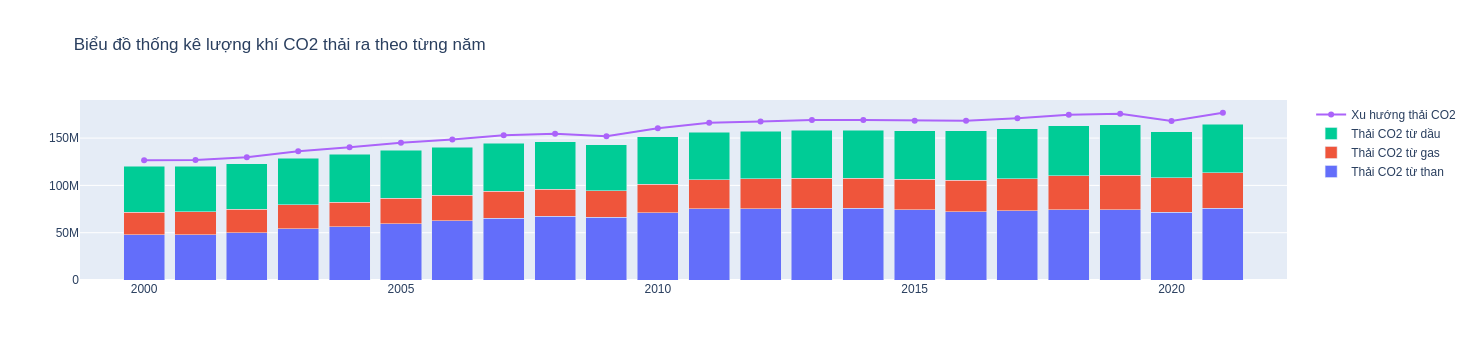

In [50]:
# Lấy các cột số
value_cols = {'avg_co2_emissions_from_coal': 'Thải CO2 từ than', 'avg_co2_emissions_from_gas': 'Thải CO2 từ gas', 'avg_co2_emissions_from_oil': 'Thải CO2 từ dầu'}

# Tạo stacked bar chart layout
layout = go.Layout(title='Biểu đồ thống kê lượng khí CO2 thải ra theo từng năm', barmode='stack')

# Tạo danh sách lưu các trace
traces = []
for key, value in value_cols.items():
    trace = go.Bar(x=co2_by_year['year'], y=co2_by_year[key], name=value)
    traces.append(trace)

# Vẽ bar chart
fig = go.Figure(data=traces, layout=layout)

# Thêm line trace
fig.add_trace(go.Scatter(x=co2_by_year['year'], y=co2_by_year['avg_co2_emissions'], mode='lines+markers', name='Xu hướng thải CO2'))
fig.show()


Biểu đồ cho thấy số liệu thống kê về lượng khí thải CO2 từ năm 2000 đến 2021, được phân loại theo các nguồn sản xuất năng lượng khác nhau. Dữ liệu này cho thấy tổng lượng khí thải CO2 hàng năm, cũng như từng lượng khí thải CO2 từ dầu, khí đốt, và than đá.

Dữ liệu về lượng khí thải CO2 từ sản xuất năng lượng cho thấy một số điểm quan trọng:

- **Sự gia tăng liên tục:** Có một xu hướng tăng trưởng liên tục trong lượng khí thải CO2 qua các năm, điều này phản ánh sự phụ thuộc mạnh mẽ vào nhiên liệu hóa thạch như than đá, dầu mỏ và khí đốt.

- **Ảnh hưởng của các nguồn năng lượng:** Dữ liệu cũng cho thấy sự khác biệt về mức độ góp phần của từng loại nhiên liệu đến tổng lượng khí thải, trong đó than đá thường chiếm tỷ lệ cao nhất.

Thông qua biểu đồ này, chúng ta có thể nhận thấy một mô hình nhất quán trong mức độ phát thải và hiểu rõ hơn về ảnh hưởng của các loại năng lượng khác nhau đối với ô nhiễm môi trường. Điều này cung cấp cái nhìn sâu sắc về tác động của việc sử dụng năng lượng và là cơ sở quan trọng để đánh giá và phát triển các chiến lược giảm thiểu khí thải CO2 trong tương lai.

### Câu hỏi 2: Lượng khí thải CO2 ở các quốc gia trên thế giới chênh lệch như thế nào?

In [40]:
# Lấy trung bình lượng khí thải CO2 theo từng quốc gia
co2_by_country = raw_df.groupby('country')['co2_emissions'].agg(avg_co2_emissions='mean').reset_index()
co2_by_country

,country,avg_co2_emissions
0,Afghanistan,6959944.62
1,Albania,4541640.32
2,Algeria,130034914.18
3,Angola,20108535.00
4,Antigua and Barbuda,530589.32
...,...,...
194,Venezuela,144817838.18
195,Vietnam,165444032.91
196,Yemen,18634445.27
197,Zambia,4171764.32


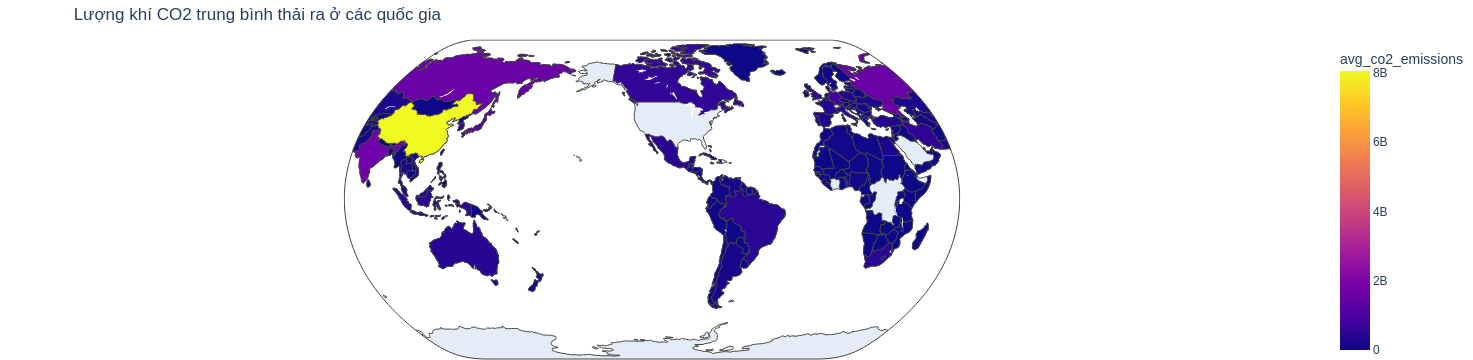

In [43]:
# Tạo world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Kết hợp world map với dữ liệu co2_by_country
merged = world.merge(co2_by_country, left_on='name', right_on='country', how='left')

#  Cấu hình choropleth map
fig = px.choropleth(merged, 
                    locations='iso_a3',  # ISO Alpha-3 (mã quốc gia)
                    color='avg_co2_emissions',  # Chỉnh màu dựa vào cột avg_co2_emissions
                    hover_name='country',  # Thông tin khi di chuột vào quốc gia
                    projection='n atural earth',
                    title='Lượng khí CO2 trung bình thải ra ở các quốc gia')

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})


# Show the plot
fig.show()


Biểu đồ bạn cung cấp mô tả lượng khí CO2 trung bình thải ra ở các quốc gia, với màu sắc khác nhau đại diện cho lượng thải khác nhau. Dựa vào biểu đồ này, ta có thể nhận xét:

- **Sự chênh lệch lớn**: Có sự chênh lệch đáng kể về lượng khí thải CO2 giữa các quốc gia, điều này có thể phản ánh mức độ công nghiệp hóa, quy mô dân số, và chính sách môi trường của từng quốc gia.
- **Mối quan hệ với phát triển**: Các quốc gia có lượng khí thải cao thường là những nước có nền kinh tế phát triển mạnh, cho thấy mối liên hệ giữa phát triển kinh tế và lượng khí thải CO2.
- **Cần thiết phải hành động**: Biểu đồ nhấn mạnh tầm quan trọng của việc giảm thiểu khí thải CO2, đặc biệt là từ các quốc gia có lượng thải lớn, để đối phó với biến đổi khí hậu toàn cầu.

Nhìn chung, biểu đồ cung cấp cái nhìn tổng quan về tình hình khí thải CO2 toàn cầu và gợi ý về nhu cầu cải thiện chính sách môi trường và phát triển bền vững.